In [138]:
#Homework 03 - kMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering as SC

In [132]:
f = lambda x : np.array([i[0] ** 2+ i[1] ** 2 for i in x]).T.reshape(-1,1)
    
def KMeans(X,k):
    n = X.shape[0]
    cid = np.random.choice(n,k)
    Center = X[cid,:];
    idx = np.zeros(n)
    tol = 100
    for i in range(tol):
        oldidx = idx.copy()
        P = np.array([[np.linalg.norm(X[n1,:] - Center[n2,:]) for n2 in range(k)]for n1 in range(n)])
        idx = np.array([np.argmin(i) for i in P])
        for i in range(k):
            Center[i,:] = np.mean(X[idx == i,:],axis = 0)
        if np.sum(oldidx != idx) == 0:
            break
    return idx,Center

In [133]:
X = pd.read_csv(r'C:\Users\703\Desktop\machinelearning_homework-master\machinelearning_homework-master\homework_03_kmeans\dataset_circles.csv',header=None)
X = X.iloc[:,0:2].values

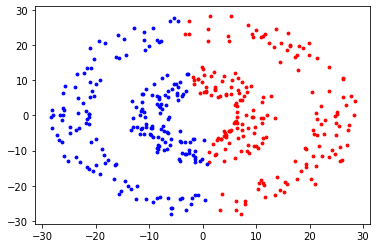

In [135]:
idx,_ = KMeans(X,2)
colors = ['red','blue']
fig,ax = plt.subplots(1)
for i in range(2):
    ax.scatter(X[idx == i,0],X[idx == i,1],s=8,c=colors[i])
plt.show()

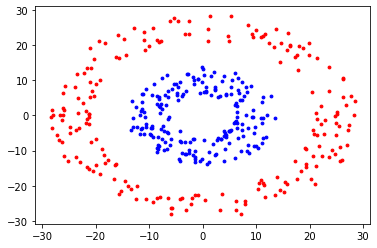

In [137]:
idx,_ = KMeans(f(X),2)
colors = ['red','blue']
fig,ax = plt.subplots(1)
for i in range(2):
    ax.scatter(X[idx == i,0],X[idx == i,1],s=8,c=colors[i])
plt.show()


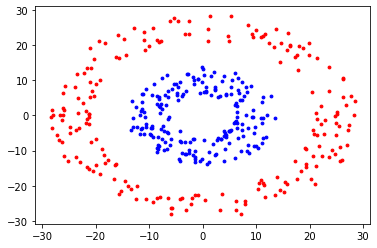

In [139]:
labels = SC(n_clusters=2).fit(X).labels_
colors = ['red','blue']
fig,ax = plt.subplots(1)
for i in range(2):
    ax.scatter(X[labels == i,0],X[labels == i,1],s=8,c=colors[i])
plt.show()